<a href="https://colab.research.google.com/github/020/020.github.io/blob/master/21_12_22_Presentations_LSTM_Exp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import LSTM
from keras.models import load_model
import keras
import h5py
import requests
import os

<ipython-input-2-7aba679d8301>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [4]:
data_df =  pd.read_csv('/content/ed_presentations_from_aug2020.csv', index_col = 0)
data_df.head()

,y
ds,
01/08/2020,2844
02/08/2020,2973
03/08/2020,3176
04/08/2020,2888
05/08/2020,2870


In [5]:
data_df.shape

(838, 1)

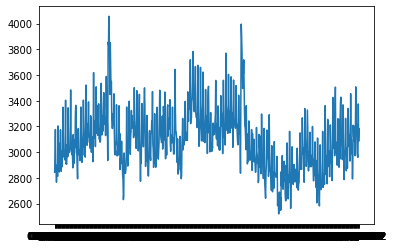

In [6]:
plt.plot(data_df['y'])
plt.show()

In [7]:
data_df['ds'] = data_df.index
data_df.head()

,y,ds
ds,,
01/08/2020,2844,01/08/2020
02/08/2020,2973,02/08/2020
03/08/2020,3176,03/08/2020
04/08/2020,2888,04/08/2020
05/08/2020,2870,05/08/2020


In [8]:
data_df['ds'] = pd.to_datetime(data_df['ds'])

In [9]:
data_df.head()

,y,ds
ds,,
01/08/2020,2844,2020-01-08
02/08/2020,2973,2020-02-08
03/08/2020,3176,2020-03-08
04/08/2020,2888,2020-04-08
05/08/2020,2870,2020-05-08


In [11]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(data_df['y'].values.reshape(-1, 1))

In [12]:
dataset[0:10]

array([[0.21080026],
       [0.29472999],
       [0.42680547],
       [0.23942746],
       [0.22771633],
       [0.16070267],
       [0.23227066],
       [0.24788549],
       [0.18998048],
       [0.44502277]])

In [13]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

586 252


In [15]:
print(len(data_df))
print(586 + 252)

838
838


In [16]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=15):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [17]:
x_train, y_train = create_dataset(train, look_back=15)
x_test, y_test = create_dataset(test, look_back=15)

In [18]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(570, 15)
(570,)
(236, 15)
(236,)


In [19]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(570, 1, 15)
(570,)
(236, 1, 15)
(236,)


In [21]:
look_back = 15
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
570/570 - 3s - loss: 0.0198 - 3s/epoch - 6ms/step
Epoch 2/20
570/570 - 1s - loss: 0.0105 - 1s/epoch - 2ms/step
Epoch 3/20
570/570 - 1s - loss: 0.0089 - 1s/epoch - 2ms/step
Epoch 4/20
570/570 - 1s - loss: 0.0083 - 1s/epoch - 2ms/step
Epoch 5/20
570/570 - 1s - loss: 0.0079 - 1s/epoch - 2ms/step
Epoch 6/20
570/570 - 1s - loss: 0.0077 - 1s/epoch - 2ms/step
Epoch 7/20
570/570 - 1s - loss: 0.0074 - 1s/epoch - 2ms/step
Epoch 8/20
570/570 - 1s - loss: 0.0076 - 1s/epoch - 2ms/step
Epoch 9/20
570/570 - 1s - loss: 0.0075 - 1s/epoch - 2ms/step
Epoch 10/20
570/570 - 1s - loss: 0.0072 - 1s/epoch - 2ms/step
Epoch 11/20
570/570 - 1s - loss: 0.0072 - 1s/epoch - 2ms/step
Epoch 12/20
570/570 - 1s - loss: 0.0071 - 1s/epoch - 2ms/step
Epoch 13/20
570/570 - 1s - loss: 0.0073 - 1s/epoch - 2ms/step
Epoch 14/20
570/570 - 1s - loss: 0.0072 - 1s/epoch - 2ms/step
Epoch 15/20
570/570 - 1s - loss: 0.0071 - 1s/epoch - 2ms/step
Epoch 16/20
570/570 - 1s - loss: 0.0070 - 1s/epoch - 2ms/step
Epoch 17/20
570/5

In [22]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

8/8 [==============================] - 0s 4ms/step
Train Score: 125.80 RMSE
Test Score: 105.80 RMSE


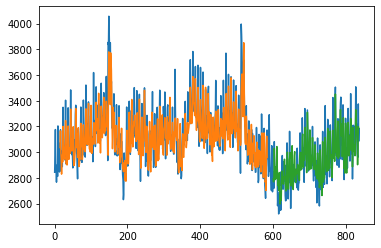

In [23]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(min_max_scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()